In [5]:
#构造4x4的随机数组
from numpy import *
random.rand(4,4)

array([[ 0.70142516,  0.76624286,  0.76852817,  0.85341183],
       [ 0.91703107,  0.22960455,  0.91748342,  0.43678499],
       [ 0.45848005,  0.48995716,  0.03290136,  0.12290189],
       [ 0.81532653,  0.55516196,  0.06988277,  0.44067742]])

In [8]:
#调用mat函数将数组转换成矩阵matrix
randMat=mat(random.rand(4,4))
randMat

matrix([[ 0.17193286,  0.08985372,  0.22320666,  0.18523909],
        [ 0.51839513,  0.80512071,  0.16249185,  0.87934443],
        [ 0.49437921,  0.93479144,  0.43857547,  0.53567519],
        [ 0.77724728,  0.31666018,  0.21805704,  0.88864842]])

In [10]:
#矩阵求逆运算
randMat.I

matrix([[-6.01149667, -3.93799415,  2.79598486,  3.46444966],
        [-2.3842268 ,  0.04888959,  1.38835591, -0.38828245],
        [ 6.28097775,  0.21311018, -0.34221547, -1.31386443],
        [ 4.5662577 ,  3.37461207, -2.85623214, -1.44408413]])

In [13]:
#矩阵乘法
invRandmat=randMat.I
randMat*invRandmat

matrix([[  1.00000000e+00,  -1.11022302e-16,   1.66533454e-16,
           0.00000000e+00],
        [  4.44089210e-16,   1.00000000e+00,   2.22044605e-16,
          -2.22044605e-16],
        [  4.99600361e-16,  -2.22044605e-16,   1.00000000e+00,
          -2.22044605e-16],
        [  8.88178420e-16,   0.00000000e+00,   0.00000000e+00,
           1.00000000e+00]])

In [15]:
#矩阵乘以其逆矩阵应该是单位矩阵，下面是得到误差值
myEye=randMat*invRandmat
myEye-eye(4)

matrix([[  2.22044605e-16,  -1.11022302e-16,   1.66533454e-16,
           0.00000000e+00],
        [  4.44089210e-16,  -4.44089210e-16,   2.22044605e-16,
          -2.22044605e-16],
        [  4.99600361e-16,  -2.22044605e-16,   2.22044605e-16,
          -2.22044605e-16],
        [  8.88178420e-16,   0.00000000e+00,   0.00000000e+00,
          -2.22044605e-16]])

In [25]:
#shape函数是numpy.core.fromnumeric中的函数，它的功能是读取矩阵的长度，比如shape[0]就是读取矩阵第一维度的长度。
e=eye(3)
e

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [49]:
e.shape[0]

3

In [52]:
x=random.rand(4,3)
x.shape[0]

4

In [28]:
#numpy tile方法
#numpy.tile(A,B)函数  重复A，B次，这里的B可以时int类型也可以是元组类型。
tile([1,2],5)#列方向重复5次，行默认1次

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2])

In [30]:
tile([1,2],(1,1))#列方向重复1次，行1次

array([[1, 2]])

In [31]:
tile([1,2],(2,1))#行2次，列1次

array([[1, 2],
       [1, 2]])

In [32]:
tile([1,2],(1,3))#行1次，列3次

array([[1, 2, 1, 2, 1, 2]])

In [34]:
tile([1,2],(2,3))#行2次，列3次

array([[1, 2, 1, 2, 1, 2],
       [1, 2, 1, 2, 1, 2]])

In [13]:
#zeros函数创建0数组
zeros(5)

array([ 0.,  0.,  0.,  0.,  0.])

In [15]:
zeros([2,3])

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [2]:
#kNN算法
from numpy import *
import operator
def CreateDataSet():
    group=array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels=['A','A','B','B']
    return group,labels
group,labels=CreateDataSet()
group

array([[ 1. ,  1.1],
       [ 1. ,  1. ],
       [ 0. ,  0. ],
       [ 0. ,  0.1]])

In [3]:
labels

['A', 'A', 'B', 'B']

In [4]:
def  classify0(inX,dataSet,labels,k):
    dataSetSize=dataSet.shape[0]
    print(dataSetSize)
    diffMat=tile(inX,(dataSetSize,1))-dataSet#将输入的点与训练样本做差
    print("这个是dataSet",dataSet)
    print("这个是测试的输入向量",tile(inX,(dataSetSize,1)))
    print("这个是点差",diffMat)
    sqDiffMat=diffMat**2#计算出距离平方
    print("这个是距离平方",sqDiffMat)
    sqDistances=sqDiffMat.sum(axis=1)#计算距离平方和
    print("这个是距离平方和",sqDistances)
    distances=sqDistances**2#开方得出距离
    sortedDistIndicies=distances.argsort()#从小到大排序，提取索引
    print("距离排序后对应的索引：",sortedDistIndicies)
    classCount={}
    for i in range(k):
        voteIlabel=labels[sortedDistIndicies[i]]
        print(voteIlabel)
        classCount[voteIlabel]=classCount.get(voteIlabel,0)+1
    sortedClassCount=sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    print(sortedClassCount)
    return sortedClassCount[0][0]
x=classify0([0,0],group,labels,3)  
x

4
这个是dataSet [[ 1.   1.1]
 [ 1.   1. ]
 [ 0.   0. ]
 [ 0.   0.1]]
这个是测试的输入向量 [[0 0]
 [0 0]
 [0 0]
 [0 0]]
这个是点差 [[-1.  -1.1]
 [-1.  -1. ]
 [ 0.   0. ]
 [ 0.  -0.1]]
这个是距离平方 [[ 1.    1.21]
 [ 1.    1.  ]
 [ 0.    0.  ]
 [ 0.    0.01]]
这个是距离平方和 [ 2.21  2.    0.    0.01]
距离排序后对应的索引： [2 3 1 0]
B
B
A
[('B', 2), ('A', 1)]


'B'

In [12]:
#实例：使用k-近邻算法改进约会网站的配对效果
def file2matrix(filename):
    fr=open(filename)
    arrayOLines=fr.readlines()
    numberOfLines=len(arrayOLines)
    print(numberOfLines)
    returnMat=zeros((numberOfLines,3))#
    print(returnMat)
    classLabelVector=[]
    index=0
    for line in arrayOLines:
        line=line.strip()
        listFromLine=line.split('\t')
        returnMat[index:]=listFromLine[0:3]#将数据赋值给矩阵
        classLabelVector.append(int(listFromLine[-1]))#获取每行的最后一个数据
        index+=1
    return returnMat,classLabelVector
filename="D:/Git/machinelearninginaction/Ch02/datingTestSet2.txt"
datingDataMat,datingLables=file2matrix(filename)
datingDataMat
#矩阵1-3列：飞行常客里程数、玩视频游戏所耗时间、每周消费的冰激凌数

1000
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 ..., 
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

In [16]:
datingLables[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

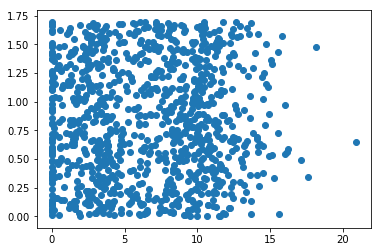

In [21]:
#制作原始数据的散点图
import matplotlib
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2])#取矩阵的第二列、第三列数据
plt.show()

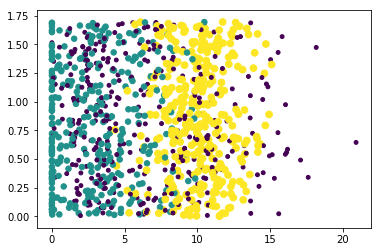

In [34]:
#个性化标记散点图上的点
import matplotlib
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2],15.0*array(datingLables),15.0*array(datingLables))
plt.show()

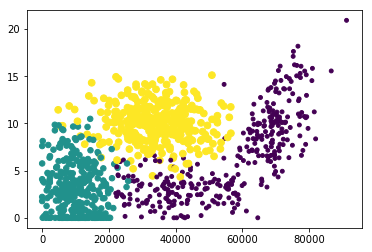

In [38]:
#个性化标记散点图上的点
#采用列1（飞行常客里程数--x轴）和列2（玩视频游戏--y轴）的属性值可以取得更好的效果
import matplotlib
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(datingDataMat[:,0],datingDataMat[:,1],15.0*array(datingLables),15.0*array(datingLables))
plt.show()